In [ ]:
#!pip install google.colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Fake News Tutorial**


## **1. Introduction**

There have always been fake news, but with the emergence of the Internet and new communication and information technologies, fake news has become part of our daily lives. Social media algorithms do not have an easy task determining the truthfulness of information. In this way, supposedly real images and videos that have been professionally manipulated are disseminated. This disinformation can influence debates and public opinion and cause a hugh damage on our society and daily lifes.

A clear recent example of the impact that fake news had on people was the case of Donald Trump’s election or Brexit. Several media outlets claim that one of the main reasons Donald Trump won the election was because he abused the posting of fake news on several of his social networks. 

Unfortunately, very few people are able to detect fake news or have time to verify if the information they are reading is real or false. This should not be a problem for people, because thanks to artificial intelligence we will be able to detect whether it is a fake or a real news.

In this notebook you will learn how to do an exploratory data analysis as well as using machine learning and deep learning algorithms to automate and detect fake news.

![](https://drive.google.com/uc?export=view&id=1IE2GD2yg-MiP7VG_j3EEgqxWuWaBJ3ey)

## **2. Dataset explained**


Training and testing examples were taken from http://www.fakenewschallenge.org/


The goal of the Fake News Challenge is to explore how artificial intelligence technologies, particularly machine learning and natural language processing, might be leveraged to combat the fake news problem. We believe that these AI technologies hold promise for significantly automating parts of the procedure human fact checkers use today to determine if a story is real or a hoax.

Assessing the veracity of a news story is a complex and cumbersome task, even for trained experts 3. Fortunately, the process can be broken down into steps or stages. A helpful first step towards identifying fake news is to understand what other news organizations are saying about the topic. We believe automating this process, called Stance Detection, could serve as a useful building block in an AI-assisted fact-checking pipeline. So stage #1 of the Fake News Challenge (FNC-1) focuses on the task of Stance Detection.

Stance Detection involves estimating the relative perspective (or stance) of two pieces of text relative to a topic, claim or issue. The version of Stance Detection we have selected for FNC-1 extends the work of Ferreira & Vlachos 4. For FNC-1 we have chosen the task of estimating the stance of a body text from a news article relative to a headline. Specifically, the body text may agree, disagree, discuss or be unrelated to the headline.

The dataset input is a  headline and a body text - either from the same news article or from two different articles and the output label is the stance of the body text relative to the claim made in the headline into one of four categories:
Agrees: The body text agrees with the headline.
Disagrees: The body text disagrees with the headline.
Discusses: The body text discuss the same topic as the headline, but does not take a position
Unrelated: The body text discusses a different topic than the headline

The image bellow help us understand better the struture of our dataset

![](https://drive.google.com/uc?export=view&id=1xjXYtNWbl2lyzlsMN7Lf5aG_7I29bwjw)


## **3. 🔎 Getting, Cleaning, Data Exploratory Analysis**
We will start with some **exploratory data analysis (EDA)**. This is a very important first step every time we start working with a new dataset. 

EDA is meant to help us understand the dataset better before doing more complex analyses. It is also an opportunity to prepare and "clean" the data.

Data preparation steps might include:
*   Removing duplicated or irrelevant observations.
*   Filtering out outlier values (sometimes caused by measurement errors) which might otherwise cause problems in our analysis.
*   Handling missing values. 
*   Plotting some of the features of the data, for example using histograms, to gain an intuitive understanding of the dataset.

The dataset is already divided in train set and test set. Thus, we just need to use the one that suits us along the way. 



### **3.1 Data Exploratory Analysis**

We as humans are very biased. In everyday life, we make many assumptions that turn out to be wrong. For example, when something bad happened, we have a "hindsight bias", i.e. we think that we expected this to happen, even though we actually didn't. Or the loss-aversion bias. If an item has a certain value, then we weight loosing it higher than gaining it. There are many more biases, and Wikipedia has a very exhaustive list, [if you're interested](https://en.wikipedia.org/wiki/List_of_cognitive_biases) . We may be born with some of these biases, but others are usually acquired when we grow up.

Similarly, Machine Learning algorithms can also acquire biases when they grow up, i.e. when we train them on a problem. If you want your algorithm to classify diseases, but only provide images of a certain sub-population, it will assume that everyone falls into that population. For example, if you train it on images of men, it'll assume that there are only men in this world. If you then show it a picture of a woman, it'll make a wrong decision. This can have very bad consequences. In the worst case, your algorithm discriminates against a certain ethnicity, and suddenly you make headlines as the inventor of a racist AI. Important to note is that the algorithm itself has no tendency to be biased. But if we provide it with a biased dataset, it will eventually become biased, because it doesn't know better.

In this step we will check for a balanced data so we can train the machine learning models without oversampling or undersampling classes. If we see some bias towards one class we need to apply techniques to manage this issue with our data set.

First step is to check if we have all Python packages we need be using to visualize the characteristics of the dataset to check for class balance, and install those missing if any. We will need to join files containing labeling of examples to content of articles for our purpose.

We want to check for: 1. Number of examples in each class, 2. Total Percentage of examples in each class, 3. Distribution of the lenght of each example as we will use its word content to train for classification.


Now that we have secured environment requirements for python packages that will be declared in the code, next we will import them into the program

In [ ]:
import matplotlib.pyplot as plt
#import required libraries
import matplotlib.ticker as mtick
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import pickle as pkl
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
#GBM algorithm
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from matplotlib.pylab import rcParams
from sklearn import tree
from csv import DictReader
from csv import DictWriter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.python.keras.layers import  Input, Embedding, Dot, Reshape, Dense
from tensorflow.python.keras.models import Model
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

We want to check for: 1. Number of examples in each class, 2. Total Percentage of examples in each class, 3. Distribution of the lenght of each example as we will use its word content to train for classification.

Data is already included in /content/FakeNews folder. Data is already separated by example content and labeled files, and also in train, test and demo files to keep process clean.


To upload trainning examples (which are stored in CSV )files is from the GitHub repository. Click on the dataset in repository, then click on View Raw. Copy the link to the raw dataset and store it as a string variable then to load the link into Pandas read_csv to get the data frame.

We create variables where we will store all our training examples data.

In [ ]:
data = []
train_df=[]
trainbodies_df = []
trainstances_df = []

The read_csv () function is smart enough to decipher whether it's working with full or relative file paths and convert your flat file as a DataFrame without a problem.

In [ ]:
trainbodies_url = 'https://raw.githubusercontent.com/StavroK/MtySaturdayAI2020/master/train_bodies.csv'
trainbodies_df = pd.read_csv(trainbodies_url)

In [ ]:
trainstances_url = 'https://raw.githubusercontent.com/StavroK/MtySaturdayAI2020/master/train_stances.random.csv'
trainstances_df = pd.read_csv(trainstances_url)

In [ ]:
print("Total stances: " + str(len(trainstances_df)))
print("Total bodies: " + str(len(trainbodies_df)))

Total stances: 49972
Total bodies: 1683


We take a look at our columns of our dataframe trainbodies.



In [ ]:
trainbodies_df.columns

Index(['Body ID', 'articleBody'], dtype='object')

We also take a look at the top 5 results ordered by id value.

In [ ]:
trainbodies_df.sort_values(by='Body ID')
trainbodies_df.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


As well we take a look at our columns of our dataframe trainstances to verify that there are no errors.

In [ ]:
trainstances_df.columns


Index(['Headline', 'Body ID', 'Stance'], dtype='object')

Like before take a look at the top 5 results ordered by id value.

In [ ]:
trainstances_df.sort_values(by='Body ID')
trainstances_df.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,discuss
1,Hundreds of Palestinians flee floods in Gaza a...,158,discuss
2,"Christian Bale passes on role of Steve Jobs, a...",137,disagree
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,disagree
4,Spider burrowed through tourist's stomach and ...,1923,agree


We merge both dataframes and save them in a new dataframe variable.

In [ ]:
train_df = pd.merge(trainbodies_df,trainstances_df, on="Body ID")
print("Total training examples: " + str(len(train_df)))

Total training examples: 49972


We see the columns of the new dataframe and the first and last 5 results.

In [ ]:
train_df.columns

Index(['Body ID', 'articleBody', 'Headline', 'Stance'], dtype='object')

In [ ]:
train_df.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",discuss
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,disagree
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,agree
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,agree


In [ ]:
train_df.tail()

,Body ID,articleBody,Headline,Stance
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",disagree
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",unrelated
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",discuss
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,disagree
49971,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,agree


We see the stances that our training dataframe has.

In [ ]:
stances = []
stances = train_df['Stance']

In [ ]:
stances.head()

0      discuss
1     disagree
2        agree
3    unrelated
4        agree
Name: Stance, dtype: object

In [ ]:
stances.unique()

array(['discuss', 'disagree', 'agree', 'unrelated'], dtype=object)

As we can see there's 4 stances of classification into our dataset. Let's see how many articles there are that correspond to each stance. We will use Matplotlib that is a library for the generation of graphs from data contained in lists or arrays.

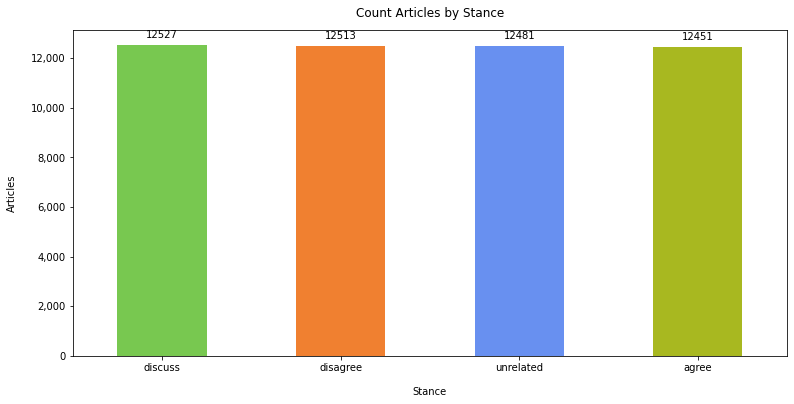

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
fmt = '{x:,.0f}'
plt.figure(figsize=(12.8,6))
ax = stances.value_counts().plot(kind='bar', color=pkmn_type_colors,rot=0)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
for p in ax.patches: 
  ax.annotate(np.round(p.get_height(),decimals=2), 
              (p.get_x()+p.get_width()/2., p.get_height()), 
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  
plt.xlabel("Stance", labelpad=14)
plt.ylabel("Articles", labelpad=14)
plt.title("Count Articles by Stance", y=1.02);


As seen above we have a similar distribution of samples upon each category. Let's take a closer look into the percentages of samples for each stance.

In [ ]:
train_df_by_stances = train_df.groupby('Stance')['Body ID'].count()
TotalArticles = train_df_by_stances[0:].sum()
train_df_by_stances['Percent of Total'] = train_df_by_stances[0:]*100 / TotalArticles
print(train_df_by_stances['Percent of Total'])

Stance
agree        24.915953
disagree     25.040022
discuss      25.068038
unrelated    24.975987
Name: Body ID, dtype: float64


As we have done before, we will use Matplotlib to generate a graph as a function of the percentage.

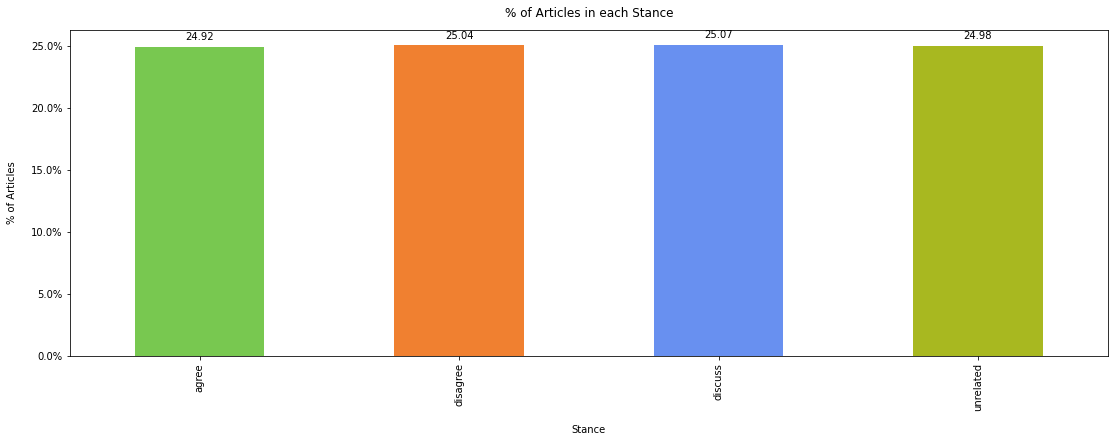

In [ ]:
plt.figure(figsize=(18.6,6))
ax= train_df_by_stances['Percent of Total'].plot(kind='bar', color=pkmn_type_colors)
labels = list(train_df_by_stances.index)
ax.set_xlabel(labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches: 
  ax.annotate(np.round(p.get_height(),decimals=2), 
              (p.get_x()+p.get_width()/2., p.get_height()), 
              ha='center', va='center', xytext=(0, 10), 
              textcoords='offset points')

plt.xlabel("Stance", labelpad=14)
plt.ylabel("% of Articles", labelpad=14)
plt.title("% of Articles in each Stance", y=1.02);

Checking Article Body lenght to review is there is not a big diffence. This is important as during feature creation process may take total number of words. To do this we will create a new column in our dataframe called 'Article_lenght' that will store the length of the articles. We will also store records length for each category.

In [ ]:
train_df['Article_lenght'] = train_df['articleBody'].str.len()

lenght_agree = train_df[train_df['Stance'] =="agree"]
lenght_disagree = train_df[train_df['Stance']=="disagree"]
lenght_discuss = train_df[train_df['Stance']=="discuss"]
lenght_unrelated = train_df[train_df['Stance']=="unrelated"]

To represent it graphically we will use Seaborn that is a Python data visualization library based on matplotlib. We represent it with a histogram with the histoplot function from the Seaborn library.

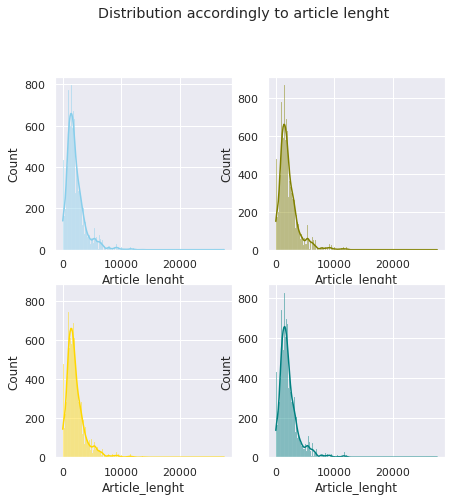

In [ ]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=train_df, x=lenght_agree['Article_lenght'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=train_df, x=lenght_disagree['Article_lenght'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=train_df, x=lenght_discuss['Article_lenght'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=train_df, x=lenght_unrelated['Article_lenght'], kde=True, color="teal", ax=axs[1, 1])

plt.suptitle("Distribution accordingly to article lenght", y=1.02);

plt.show()

There's no significantly difference in the distribution of the lenght of words across the different stances.

It can also be interesting analyse some metrics of the articles lenght.

In [ ]:
train_df['Article_lenght'].describe()

count    49972.000000
mean      2207.547266
std       1676.838550
min         38.000000
25%       1175.000000
50%       1824.000000
75%       2765.000000
max      27579.000000
Name: Article_lenght, dtype: float64

We can see that on average the articles have 2208 words, with a deviation of 1677 and the minimum of 38 and a maximum of 27579.

Now we will focus on 95% percentile to better appreciate examples' behaviour for lenght. And we do the same process as we did before but using the quantile() function from pandas to get values at the 95% quantile.

In [ ]:
quantile_95 = train_df['Article_lenght'].quantile(0.95)
train_df_95 = train_df[train_df['Article_lenght'] < quantile_95]

In [ ]:
train_df_95['Article_lenght'] = train_df_95['articleBody'].str.len()

lenght_agree = train_df_95[train_df_95['Stance'] =="agree"]
lenght_disagree = train_df_95[train_df_95['Stance']=="disagree"]
lenght_discuss = train_df_95[train_df_95['Stance']=="discuss"]
lenght_unrelated = train_df_95[train_df_95['Stance']=="unrelated"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


To represent it graphically we will use a histogram as before.

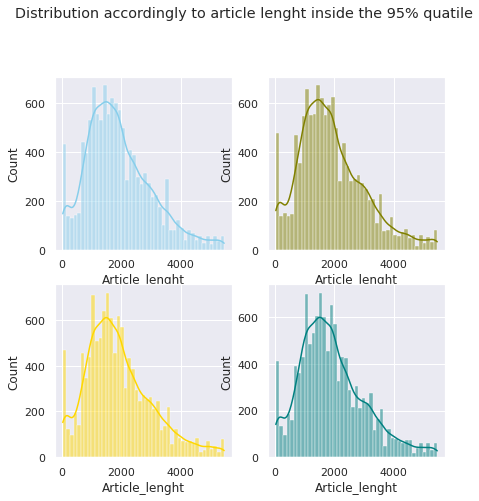

In [ ]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=train_df_95, x=lenght_agree['Article_lenght'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=train_df_95, x=lenght_disagree['Article_lenght'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=train_df_95, x=lenght_discuss['Article_lenght'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=train_df_95, x=lenght_unrelated['Article_lenght'], kde=True, color="teal", ax=axs[1, 1])

plt.suptitle("Distribution accordingly to article lenght inside the 95% quatile", y=1.02);

plt.show()

There's an uncommon amount of articles that have between 0 nd 100 words, let's take a look on a sample of these articles.

In [ ]:
bellow_100 = train_df[train_df['Article_lenght'] < 100]
bellow_100 = bellow_100.sample(n=5)
pd.set_option('display.max_colwidth', None)
print(bellow_100['articleBody'])

2712      There have been reports that iOS 8 preferences are erasing iCloud files.
39222                  Google has bought about half of Pacific Shores office park.
39275                  Google has bought about half of Pacific Shores office park.
46156    Judicial Watch has reported that ISIS members crossed the Mexican border.
26518                                       I aborted my baby because it was a boy
Name: articleBody, dtype: object


Although they are short they seems to be a regular body article so we keep them.  

Next we will like to know how many articles are over 95% percentail in thier character count for article body. We do this just to understand data before feature engineering.

In [ ]:
train_df__more_quantile95 = train_df[train_df['Article_lenght'] > quantile_95]

Let's use a box plot chart vizualitation to understand length distribution in every Stance class. We will use the boxplot function from the Seaborn library.

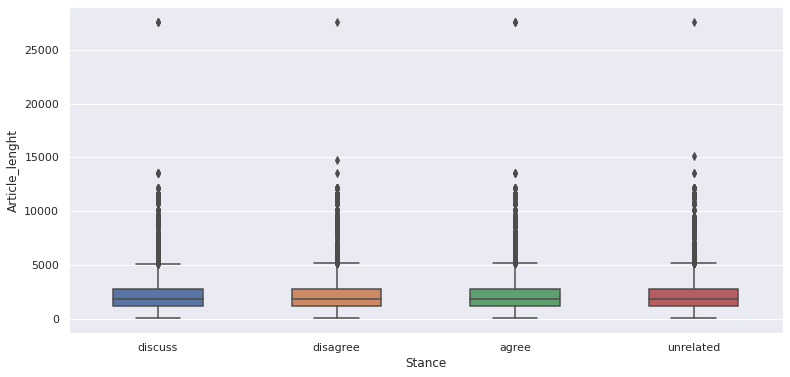

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=train_df, x='Stance', y='Article_lenght', width=.5);

We will use the same approach as histogram, and focus on 95% percentile using the train_df_95 dataframe. 

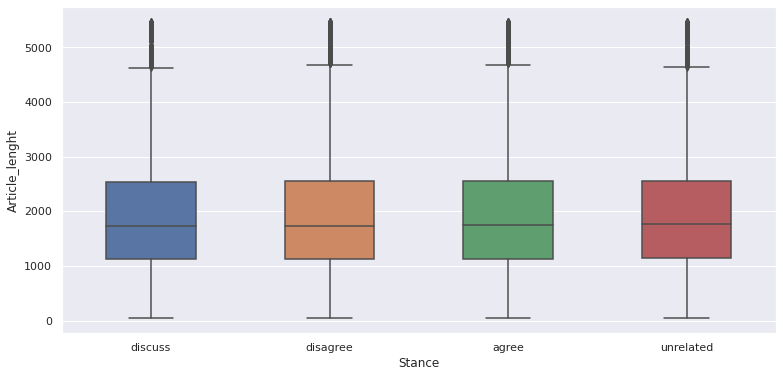

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=train_df_95, x='Stance', y='Article_lenght', width=.5);

We can see that the 95% quantile reduces significally the amount of outliers.

### **3.2 Data Cleaning and preparation**
In this step we will turn our attention the Articles Body contents. We need to replace any characters and word that do not add value to our classificator. This are characters used in: html files, double spaces, quoting signs, word case, punctuation signs, and possesive pronouns.

In order to make our study clear and aligh it with our objective we will transform the labels to get only a binary classification between fake or reliable. 

In [ ]:
train_df['Stance'] = train_df['Stance'].replace(['discuss'],'fake')
train_df['Stance'] = train_df['Stance'].replace(['disagree'],'fake')
train_df['Stance'] = train_df['Stance'].replace(['agree'],'fact')
train_df['Stance'] = train_df['Stance'].replace(['unrelated'],'fake')

We take a look to the first values.

In [ ]:
train_df.head()

,Body ID,articleBody,Headline,Stance,Article_lenght
0,0,"A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a ""relatively small"" meteorite that ""appears to have come off an asteroid that was passing close to Earth."" House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet, said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumberto Garcia, of the Astronomy Center at the National Autonomous University of Nicaragua, said the meteorite could be related to an asteroid that was forecast to pass by the planet Saturday night.\n\n""We have to study it more because it could be ice or rock,"" he said.\n\nWilfried Strauch, an adviser to the Institute of Territorial Studies, said it was ""very strange that no one reported a streak of light. We have to ask if anyone has a photo or something.""\n\nLocal residents reported hearing a loud boom Saturday night, but said they didn't see anything strange in the sky.\n\n""I was sitting on my porch and I saw nothing, then all of a sudden I heard a large blast. We thought it was a bomb because we felt an expansive wave,"" Jorge Santamaria told The Associated Press.\n\nThe site of the crater is near Managua's international airport and an air force base. Only journalists from state media were allowed to visit it.","Soldier shot, Parliament locked down after gunfire erupts at war memorial",fake,1902
1,0,"A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a ""relatively small"" meteorite that ""appears to have come off an asteroid that was passing close to Earth."" House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet, said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.\n\nHumberto Garcia, of the Astronomy Center at the National Autonomous University of Nicaragua, said the meteorite could be related to an asteroid that was forecast to pass by the planet Saturday night.\n\n""We have to study it more because it could be ice or rock,"" he said.\n\nWilfried Strauch, an adviser to the Institute of Territorial Studies, said it was ""very strange that no one reported a streak of light. We have to ask if anyone has a photo or something.""\n\nLocal residents reported hearing a loud boom Saturday night, but said they didn't see anything strange in the sky.\n\n""I was sitting on my porch and I saw nothing, then all of a sudden I heard a large blast. We thought it was a bomb because we felt an expansive wave,"" Jorge Santamaria told The Associated Press.\n\nThe site of the crater is near Managua's international airport and an air force base. Only journalists from state media were allowed to vis

Let's see how many articles there are that correspond to the new classification. As we did before, we will use Matplotlib linrary to represent it graphically.

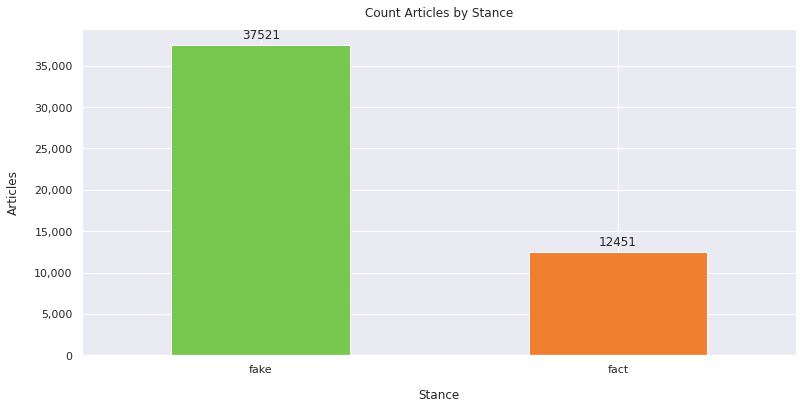

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
fmt = '{x:,.0f}'
plt.figure(figsize=(12.8,6))
ax = train_df['Stance'].value_counts().plot(kind='bar', color=pkmn_type_colors,rot=0)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
for p in ax.patches: 
  ax.annotate(np.round(p.get_height(),decimals=2), 
              (p.get_x()+p.get_width()/2., p.get_height()), 
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  
plt.xlabel("Stance", labelpad=14)
plt.ylabel("Articles", labelpad=14)
plt.title("Count Articles by Stance", y=1.02);

We can appreciate that there are many more fake articles than fact. 

Essencially there's a couple ways to deal with the problem:

- Data-level techniques — At the data level, solutions work by applying resampling techniques to balance the dataset. These can be done by oversampling the minority class, which is to synthetically create new instances from existing ones; or undersampling the majority class, which eliminates some instances in the majority class. However, both techniques can have their drawbacks. Oversampling new data can cause the classifier to overfit; whereas undersampling can discard essential information. A combination of both techniques with a heuristic approach can be found in specialized literature with excellent results.

- Algorithmic-level techniques —Algorithmic level solutions can be done by adjusting weighted costs accordingly to the number of training instances in each class. In parametric classifier like Support Vector Machine, grid search and cross-validation can be applied to optimise the C and gamma values. For non-parametric classifier like the decision tree, adjusting the probabilistic estimate at the tree leaf can improve the performance.

- A combination of both — A hybrid approach is also constantly being explored in various literature, including AdaOUBoost (adaptive over-sampling and undersampling boost) proposed by Peng and Yao and Learning By Recognition, using the concept of auto association-based classification approach proposed by Japkowicz.

We will apply now Data-level techniques, and later on see if we can also apply some hybrid solution.

In [ ]:
train_df["Stance"].value_counts()

fake    37521
fact    12451
Name: Stance, dtype: int64

To balance the classes we will use imbalanced-learn that is a python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. To make it we will use the Random Under Sampler function that involves sampling any random class with or without any replacement.

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

labels = train_df["Stance"]
text = train_df.iloc[:, :-1]
print(text.columns)
print("Before undersampling: ", Counter(labels))


undersample = RandomUnderSampler(sampling_strategy='majority')
text ,labels = undersample.fit_resample(text,labels)

print("After undersampling: ", Counter(labels))

train_df_balanced = pd.DataFrame(text, columns=['Body ID', 'articleBody', 'Headline', 'Stance'])


Index(['Body ID', 'articleBody', 'Headline', 'Stance'], dtype='object')
Before undersampling:  Counter({'fake': 37521, 'fact': 12451})
After undersampling:  Counter({'fact': 12451, 'fake': 12451})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


As we can see, the classes are balanced once the undersampling strategy is applied.

Let's subset our dataset to have a quicker processing times. Let's say 1%

In [ ]:
sample_train_df = train_df_balanced.sample(frac=0.01)
print(sample_train_df)
labels = sample_train_df["Stance"]
text = sample_train_df.iloc[:, :-1]

print("Before undersampling: ", Counter(labels))

      Body ID  ... Stance
6336     1427  ...   fact
22801     932  ...   fake
708       161  ...   fact
23340     702  ...   fake
11715    2404  ...   fact
...       ...  ...    ...
16459    1064  ...   fake
11513    2367  ...   fact
6751     1517  ...   fact
20109    2354  ...   fake
11153    2304  ...   fact

[249 rows x 4 columns]
Before undersampling:  Counter({'fact': 131, 'fake': 118})


### **3.3 Text pre processing**



In natural language processing, text preprocessing is the practice of cleaning and preparing text data. NLTK and re are common Python libraries used to handle many text preprocessing tasks.

In [ ]:
sample_train_df['articleBody_Parsed'] = sample_train_df['articleBody'].str.lower().replace("\r", " ").replace("\n", " ").replace("    ", " ").replace('"', '').replace('[^\w\s]','').replace("'s", "")

train_df['Headline'] = train_df['Headline'].str.lower().replace("\r", " ").replace("\n", " ").replace("    ", " ").replace('"', '').replace('[^\w\s]','').replace("'s", "")

#### **3.3.1 Tokenization**

In natural language processing, tokenization is the text preprocessing task of breaking up text into smaller components of text (known as tokens).

![](https://drive.google.com/uc?export=view&id=11CQktJIv4X1xkH2k-4xcPXcI8xMLVyZ3)

We will use The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. Natural Language toolkit has very important module NLTK tokenize sentences which further comprises of sub-modules

1. word tokenize
2. sentence tokenize

We will use the method word_tokenize() to split a sentence into words.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will apply the method to the body and the headline and we will look at the first two rows to see the tokenization of our dataframe.

In [ ]:
sample_train_df['tokenized_body'] = sample_train_df['articleBody_Parsed'].apply(word_tokenize)

sample_train_df['tokenized_headline'] = sample_train_df['Headline'].apply(word_tokenize)
sample_train_df.head(1)

,Body ID,articleBody,Headline,Stance,articleBody_Parsed,tokenized_body,tokenized_headline
6336,1427,"None of the 28 bodies found in a mass grave in restive southwestern Mexico belongs to a group of 43 missing students, Mexico's attorney general said on Tuesday.\n\nThe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of Guerrero on Sept. 26.\n\nThe discovery of a series of mass graves near the town of Iguala, where the students went missing, has sent shockwaves throughout Mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nSpeaking at a press conference on Tuesday, Mexican Attorney General Jesus Murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""What I can say is that the first mass grave we found, the very first ones from where we already have results, I can say the (remains) don't match the DNA of the families of these young people,"" he said. But authorities had found another mass grave near the site, Murillo said, and were now checking those remains. He also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nProtesters in Mexico Demand Answers on Missing Students\n\nMass Graves Found Near Mexico Town Where Students Went Missing\n\nMexico Massacre Victims Feared to Be Missing Students",Mexico checks if 43 missing students in mass grave,fact,"none of the 28 bodies found in a mass grave in restive southwestern mexico belongs to a group of 43 missing students, mexico's attorney general said on tuesday.\n\nthe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of guerrero on sept. 26.\n\nthe discovery of a series of mass graves near the town of iguala, where the students went missing, has sent shockwaves throughout mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nspeaking at a press conference on tuesday, mexican attorney general jesus murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""what i can say is that the first mass grave we found, the very first ones from where we already have results, i can say the (remains) don't match the dna of the families of these young people,"" he said. but authorities had found another mass grave near the site, murillo said, and were now checking those remains. he also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nprotesters in mexico demand answers on missing students\n\nmass graves found near mexico town where students went missing\n\nmexico massacre victims feared to be missing students","[none, of, the, 28, bodies, found, in, a, mass, grave, in, restive, southwestern, mexico, belongs, to, a, group, of, 43, missing, students, ,, mexico, 's, attorney, general, said, on, tuesday, ., the, students, ,, who, are, feared, to, have, been, massacred, by, police, in, league, with, gang, members, ,, went, missing, in, the, southwestern, state, of, guerrero, on, sept., 26., the, discovery, of, a, series, of, mass, graves, near, the, town, of, iguala, ,, where, the, students, went, missing, ,, has, sent, shockwaves, throughout, mexico, ,, where, around, 100,000, people, have, died, in, drug-related, violence, since, 2007., speaking, at, a, ...]","[Mexico, checks, if, 43, missing, students, in, mass, grave]"
22801,932,"India is going through some serious public sector reforms under Prime Minister Narendra Modi. So not turning up for work for a quarter of a century is now not OK, as one civil servant found out recently.\n\nIndia's Central Public Works Department (CPWD), in a press release dated Jan. 8, 2015, announced the dismissal of a senior electrical engineer employed by the department for 35 years. He only worked the first 10.\n\nIt sound

#### **3.3.2 Removing stop words**

Since there's a lot of prepositions (in, of, to) and conjunctions (and, but, or, nor, for, so, yet) and ponctuation (, - .) and definite or indefinite articles (a,an,the) in our data, it might be useful to introduce a key concept on Natural Language Processing stop words. Stop words refers to the most common words in a language and when dealing with text processing they shoul be removed, since they do not add any valuable information to our studies.

![](https://drive.google.com/uc?export=view&id=1QIBzL-yx4qCPyk8klr4EpiMQyvKDt8tD)

Now we will remove all stop words, by using a regular expression. For that first we will also use a NLP Toolkit from nltk python package; download and store them in a python object.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We will apply the stopwords to the body and the headline as we did with the tokenization. Also we will remove the punctuation.

In [ ]:
import string
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation  + "”" + "“" + "’" + "``" + "‘"


sample_train_df['stopwords_removed_body'] = sample_train_df['tokenized_body'].apply(lambda x: [word for word in x if word not in stop_words])
unwanted_characters=["",""]
sample_train_df['stopwords_removed_body']  = sample_train_df['stopwords_removed_body'].apply(lambda x: [word.replace("'", "") for word in x])
sample_train_df['stopwords_removed_body']  = sample_train_df['stopwords_removed_body'].apply(lambda x: [word for word in x if word not in punctuation])


sample_train_df['stopwords_removed_headline'] = sample_train_df['tokenized_headline'].apply(lambda x: [word for word in x if word not in stop_words])
sample_train_df['stopwords_removed_headline']  = sample_train_df['stopwords_removed_headline'].apply(lambda x: [word.replace("'", "") for word in x])
sample_train_df['stopwords_removed_headline']  = sample_train_df['stopwords_removed_headline'].apply(lambda x: [word for word in x if word not in punctuation])


We will see the first 5 rows of the dataframe once the stopwords have been removed.

In [ ]:
sample_train_df.head(5)

,Body ID,articleBody,Headline,Stance,articleBody_Parsed,tokenized_body,tokenized_headline,stopwords_removed_body,stopwords_removed_headline
6336,1427,"None of the 28 bodies found in a mass grave in restive southwestern Mexico belongs to a group of 43 missing students, Mexico's attorney general said on Tuesday.\n\nThe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of Guerrero on Sept. 26.\n\nThe discovery of a series of mass graves near the town of Iguala, where the students went missing, has sent shockwaves throughout Mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nSpeaking at a press conference on Tuesday, Mexican Attorney General Jesus Murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""What I can say is that the first mass grave we found, the very first ones from where we already have results, I can say the (remains) don't match the DNA of the families of these young people,"" he said. But authorities had found another mass grave near the site, Murillo said, and were now checking those remains. He also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nProtesters in Mexico Demand Answers on Missing Students\n\nMass Graves Found Near Mexico Town Where Students Went Missing\n\nMexico Massacre Victims Feared to Be Missing Students",Mexico checks if 43 missing students in mass grave,fact,"none of the 28 bodies found in a mass grave in restive southwestern mexico belongs to a group of 43 missing students, mexico's attorney general said on tuesday.\n\nthe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of guerrero on sept. 26.\n\nthe discovery of a series of mass graves near the town of iguala, where the students went missing, has sent shockwaves throughout mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nspeaking at a press conference on tuesday, mexican attorney general jesus murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""what i can say is that the first mass grave we found, the very first ones from where we already have results, i can say the (remains) don't match the dna of the families of these young people,"" he said. but authorities had found another mass grave near the site, murillo said, and were now checking those remains. he also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nprotesters in mexico demand answers on missing students\n\nmass graves found near mexico town where students went missing\n\nmexico massacre victims feared to be missing students","[none, of, the, 28, bodies, found, in, a, mass, grave, in, restive, southwestern, mexico, belongs, to, a, group, of, 43, missing, students, ,, mexico, 's, attorney, general, said, on, tuesday, ., the, students, ,, who, are, feared, to, have, been, massacred, by, police, in, league, with, gang, members, ,, went, missing, in, the, southwestern, state, of, guerrero, on, sept., 26., the, discovery, of, a, series, of, mass, graves, near, the, town, of, iguala, ,, where, the, students, went, missing, ,, has, sent, shockwaves, throughout, mexico, ,, where, around, 100,000, people, have, died, in, drug-related, violence, since, 2007., speaking, at, a, ...]","[Mexico, checks, if, 43, missing, students, in, mass, grave]","[none, 28, bodies, found, mass, grave, restive, southwestern, mexico, belongs, group, 43, missing, students, mexico, s, attorney, general, said, tuesday, students, feared, massacred, police, league, gang, members, went, missing, southwestern, state, guerrero, sept., 26., discovery, series, mass, graves, near, town, iguala, students, went, missing, sent, shockwaves, throughout, mexico, aro

As we can see "A small meteorite" is now "small meteorite" since a is a stop word it was removed.

#### **3.2.1  Stemming vs Lemmatization**

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.

![](https://drive.google.com/uc?export=view&id=1jNT8NNSz4IsCyZpHsHBO1luQURJVsT63)

More information here: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

![](https://drive.google.com/uc?export=view&id=1NQHJossenrU7ufuqz70azutntHjTXEdR)

We will use pos_tag() function from NLTK library.

In [ ]:
nltk.download('averaged_perceptron_tagger')

sample_train_df['pos_tags_body'] = sample_train_df['stopwords_removed_body'].apply(nltk.tag.pos_tag)
sample_train_df['pos_tags_headline'] = sample_train_df['stopwords_removed_headline'].apply(nltk.tag.pos_tag)

sample_train_df.head(1)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Body ID,articleBody,Headline,Stance,articleBody_Parsed,tokenized_body,tokenized_headline,stopwords_removed_body,stopwords_removed_headline,pos_tags_body,pos_tags_headline
6336,1427,"None of the 28 bodies found in a mass grave in restive southwestern Mexico belongs to a group of 43 missing students, Mexico's attorney general said on Tuesday.\n\nThe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of Guerrero on Sept. 26.\n\nThe discovery of a series of mass graves near the town of Iguala, where the students went missing, has sent shockwaves throughout Mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nSpeaking at a press conference on Tuesday, Mexican Attorney General Jesus Murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""What I can say is that the first mass grave we found, the very first ones from where we already have results, I can say the (remains) don't match the DNA of the families of these young people,"" he said. But authorities had found another mass grave near the site, Murillo said, and were now checking those remains. He also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nProtesters in Mexico Demand Answers on Missing Students\n\nMass Graves Found Near Mexico Town Where Students Went Missing\n\nMexico Massacre Victims Feared to Be Missing Students",Mexico checks if 43 missing students in mass grave,fact,"none of the 28 bodies found in a mass grave in restive southwestern mexico belongs to a group of 43 missing students, mexico's attorney general said on tuesday.\n\nthe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of guerrero on sept. 26.\n\nthe discovery of a series of mass graves near the town of iguala, where the students went missing, has sent shockwaves throughout mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nspeaking at a press conference on tuesday, mexican attorney general jesus murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""what i can say is that the first mass grave we found, the very first ones from where we already have results, i can say the (remains) don't match the dna of the families of these young people,"" he said. but authorities had found another mass grave near the site, murillo said, and were now checking those remains. he also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nprotesters in mexico demand answers on missing students\n\nmass graves found near mexico town where students went missing\n\nmexico massacre victims feared to be missing students","[none, of, the, 28, bodies, found, in, a, mass, grave, in, restive, southwestern, mexico, belongs, to, a, group, of, 43, missing, students, ,, mexico, 's, attorney, general, said, on, tuesday, ., the, students, ,, who, are, feared, to, have, been, massacred, by, police, in, league, with, gang, members, ,, went, missing, in, the, southwestern, state, of, guerrero, on, sept., 26., the, discovery, of, a, series, of, mass, graves, near, the, town, of, iguala, ,, where, the, students, went, missing, ,, has, sent, shockwaves, throughout, mexico, ,, where, around, 100,000, people, have, died, in, drug-related, violence, since, 2007., speaking, at, a, ...]","[Mexico, checks, if, 43, missing, students, in, mass, grave]","[none, 28, bodies, found, mass, grave, restive, southwestern, mexico, belongs, group, 43, missing, students, mexico, s, attorney, general, said, tuesday, students, feared, massacred, police, league, gang, members, went, missing, southwestern, state, guerrero, sept., 26., discovery, series, mass, graves, near, town, iguala, students, went, missing, sent, sho

We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. Finally, we apply NLTK’s word lemmatizer.

In [ ]:
from nltk.corpus import stopwords, wordnet

def get_wordnet_pos(tag):
  """
  Function to convert tags into wordnet's format
  """
  if tag.startswith('J'):
      return wordnet.ADJ
  elif tag.startswith('V'):
      return wordnet.VERB
  elif tag.startswith('N'):
      return wordnet.NOUN
  elif tag.startswith('R'):
      return wordnet.ADV
  else:
      return wordnet.NOUN


sample_train_df['wordnet_pos_body'] = sample_train_df['pos_tags_body'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
sample_train_df['wordnet_pos_headline'] = sample_train_df['pos_tags_headline'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

sample_train_df.head(1)


,Body ID,articleBody,Headline,Stance,articleBody_Parsed,tokenized_body,tokenized_headline,stopwords_removed_body,stopwords_removed_headline,pos_tags_body,pos_tags_headline,wordnet_pos_body,wordnet_pos_headline
6336,1427,"None of the 28 bodies found in a mass grave in restive southwestern Mexico belongs to a group of 43 missing students, Mexico's attorney general said on Tuesday.\n\nThe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of Guerrero on Sept. 26.\n\nThe discovery of a series of mass graves near the town of Iguala, where the students went missing, has sent shockwaves throughout Mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nSpeaking at a press conference on Tuesday, Mexican Attorney General Jesus Murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""What I can say is that the first mass grave we found, the very first ones from where we already have results, I can say the (remains) don't match the DNA of the families of these young people,"" he said. But authorities had found another mass grave near the site, Murillo said, and were now checking those remains. He also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nProtesters in Mexico Demand Answers on Missing Students\n\nMass Graves Found Near Mexico Town Where Students Went Missing\n\nMexico Massacre Victims Feared to Be Missing Students",Mexico checks if 43 missing students in mass grave,fact,"none of the 28 bodies found in a mass grave in restive southwestern mexico belongs to a group of 43 missing students, mexico's attorney general said on tuesday.\n\nthe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of guerrero on sept. 26.\n\nthe discovery of a series of mass graves near the town of iguala, where the students went missing, has sent shockwaves throughout mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nspeaking at a press conference on tuesday, mexican attorney general jesus murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""what i can say is that the first mass grave we found, the very first ones from where we already have results, i can say the (remains) don't match the dna of the families of these young people,"" he said. but authorities had found another mass grave near the site, murillo said, and were now checking those remains. he also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nprotesters in mexico demand answers on missing students\n\nmass graves found near mexico town where students went missing\n\nmexico massacre victims feared to be missing students","[none, of, the, 28, bodies, found, in, a, mass, grave, in, restive, southwestern, mexico, belongs, to, a, group, of, 43, missing, students, ,, mexico, 's, attorney, general, said, on, tuesday, ., the, students, ,, who, are, feared, to, have, been, massacred, by, police, in, league, with, gang, members, ,, went, missing, in, the, southwestern, state, of, guerrero, on, sept., 26., the, discovery, of, a, series, of, mass, graves, near, the, town, of, iguala, ,, where, the, students, went, missing, ,, has, sent, shockwaves, throughout, mexico, ,, where, around, 100,000, people, have, died, in, drug-related, violence, since, 2007., speaking, at, a, ...]","[Mexico, checks, if, 43, missing, students, in, mass, grave]","[none, 28, bodies, found, mass, grave, restive, southwestern, mexico, belongs, group, 43, missing, students, mexico, s, attorney, general, said, tuesday, students, feared, massacred, police, league, gang, members, went, missing, southwestern, state, guerrero, sept., 26., discovery, series, mass, graves, near, town, igua

Now we can apply NLTK’s word lemmatizer within our trusty list comprehension. Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

In [ ]:
wnl = WordNetLemmatizer()

sample_train_df['lemmatized_body'] = sample_train_df['wordnet_pos_body'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
sample_train_df['lemmatized_headline'] = sample_train_df['wordnet_pos_headline'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

sample_train_df.head(1)

,Body ID,articleBody,Headline,Stance,articleBody_Parsed,tokenized_body,tokenized_headline,stopwords_removed_body,stopwords_removed_headline,pos_tags_body,pos_tags_headline,wordnet_pos_body,wordnet_pos_headline,lemmatized_body,lemmatized_headline
6336,1427,"None of the 28 bodies found in a mass grave in restive southwestern Mexico belongs to a group of 43 missing students, Mexico's attorney general said on Tuesday.\n\nThe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of Guerrero on Sept. 26.\n\nThe discovery of a series of mass graves near the town of Iguala, where the students went missing, has sent shockwaves throughout Mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nSpeaking at a press conference on Tuesday, Mexican Attorney General Jesus Murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""What I can say is that the first mass grave we found, the very first ones from where we already have results, I can say the (remains) don't match the DNA of the families of these young people,"" he said. But authorities had found another mass grave near the site, Murillo said, and were now checking those remains. He also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nProtesters in Mexico Demand Answers on Missing Students\n\nMass Graves Found Near Mexico Town Where Students Went Missing\n\nMexico Massacre Victims Feared to Be Missing Students",Mexico checks if 43 missing students in mass grave,fact,"none of the 28 bodies found in a mass grave in restive southwestern mexico belongs to a group of 43 missing students, mexico's attorney general said on tuesday.\n\nthe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of guerrero on sept. 26.\n\nthe discovery of a series of mass graves near the town of iguala, where the students went missing, has sent shockwaves throughout mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nspeaking at a press conference on tuesday, mexican attorney general jesus murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""what i can say is that the first mass grave we found, the very first ones from where we already have results, i can say the (remains) don't match the dna of the families of these young people,"" he said. but authorities had found another mass grave near the site, murillo said, and were now checking those remains. he also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nprotesters in mexico demand answers on missing students\n\nmass graves found near mexico town where students went missing\n\nmexico massacre victims feared to be missing students","[none, of, the, 28, bodies, found, in, a, mass, grave, in, restive, southwestern, mexico, belongs, to, a, group, of, 43, missing, students, ,, mexico, 's, attorney, general, said, on, tuesday, ., the, students, ,, who, are, feared, to, have, been, massacred, by, police, in, league, with, gang, members, ,, went, missing, in, the, southwestern, state, of, guerrero, on, sept., 26., the, discovery, of, a, series, of, mass, graves, near, the, town, of, iguala, ,, where, the, students, went, missing, ,, has, sent, shockwaves, throughout, mexico, ,, where, around, 100,000, people, have, died, in, drug-related, violence, since, 2007., speaking, at, a, ...]","[Mexico, checks, if, 43, missing, students, in, mass, grave]","[none, 28, bodies, found, mass, grave, restive, southwestern, mexico, belongs, group, 43, missing, students, mexico, s, attorney, general, said, tuesday, students, feared, massacred, police, league, gang, members, went, missing, southwestern, state, guerrero, sept., 26., discovery, se

As we can see right in the first row the word "crashed" turned to "crash" in body and "locked" turned to "lock" in the first headline. Finnaly let's turn back the lemmatized into one string 


In [ ]:
def list_to_string(list_):

  '''
  This function takes the list and put all the elements of the list to a string with 
  space as a separator
  '''
  final_string = str()
  for element in list_:
      final_string += str(element) + " "
  return final_string

sample_train_df['lemmatized_body_string'] = sample_train_df.lemmatized_body.apply(list_to_string)
sample_train_df['lemmatized_headline_string'] = sample_train_df.lemmatized_headline.apply(list_to_string)


sample_train_df['lemmatized_body_string'] = sample_train_df['lemmatized_body_string'].str.lower().replace("\r", " ").replace("\n", " ").replace("    ", " ").replace('"', '').replace('[^\w\s]','').replace("'s", "")
sample_train_df['lemmatized_headline_string'] = sample_train_df['lemmatized_headline_string'].str.lower().replace("\r", " ").replace("\n", " ").replace("    ", " ").replace('"', '').replace('[^\w\s]','').replace("'s", "")

sample_train_df.head(1)

,Body ID,articleBody,Headline,Stance,articleBody_Parsed,tokenized_body,tokenized_headline,stopwords_removed_body,stopwords_removed_headline,pos_tags_body,pos_tags_headline,wordnet_pos_body,wordnet_pos_headline,lemmatized_body,lemmatized_headline,lemmatized_body_string,lemmatized_headline_string
6336,1427,"None of the 28 bodies found in a mass grave in restive southwestern Mexico belongs to a group of 43 missing students, Mexico's attorney general said on Tuesday.\n\nThe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of Guerrero on Sept. 26.\n\nThe discovery of a series of mass graves near the town of Iguala, where the students went missing, has sent shockwaves throughout Mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nSpeaking at a press conference on Tuesday, Mexican Attorney General Jesus Murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""What I can say is that the first mass grave we found, the very first ones from where we already have results, I can say the (remains) don't match the DNA of the families of these young people,"" he said. But authorities had found another mass grave near the site, Murillo said, and were now checking those remains. He also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nProtesters in Mexico Demand Answers on Missing Students\n\nMass Graves Found Near Mexico Town Where Students Went Missing\n\nMexico Massacre Victims Feared to Be Missing Students",Mexico checks if 43 missing students in mass grave,fact,"none of the 28 bodies found in a mass grave in restive southwestern mexico belongs to a group of 43 missing students, mexico's attorney general said on tuesday.\n\nthe students, who are feared to have been massacred by police in league with gang members, went missing in the southwestern state of guerrero on sept. 26.\n\nthe discovery of a series of mass graves near the town of iguala, where the students went missing, has sent shockwaves throughout mexico, where around 100,000 people have died in drug-related violence since 2007.\n\nspeaking at a press conference on tuesday, mexican attorney general jesus murillo said none of the charred remains found in the first mass grave matched genetically with the missing students.\n\n""what i can say is that the first mass grave we found, the very first ones from where we already have results, i can say the (remains) don't match the dna of the families of these young people,"" he said. but authorities had found another mass grave near the site, murillo said, and were now checking those remains. he also said that 14 more police officers had been arrested following the earlier arrests of at least 22.\n\nprotesters in mexico demand answers on missing students\n\nmass graves found near mexico town where students went missing\n\nmexico massacre victims feared to be missing students","[none, of, the, 28, bodies, found, in, a, mass, grave, in, restive, southwestern, mexico, belongs, to, a, group, of, 43, missing, students, ,, mexico, 's, attorney, general, said, on, tuesday, ., the, students, ,, who, are, feared, to, have, been, massacred, by, police, in, league, with, gang, members, ,, went, missing, in, the, southwestern, state, of, guerrero, on, sept., 26., the, discovery, of, a, series, of, mass, graves, near, the, town, of, iguala, ,, where, the, students, went, missing, ,, has, sent, shockwaves, throughout, mexico, ,, where, around, 100,000, people, have, died, in, drug-related, violence, since, 2007., speaking, at, a, ...]","[Mexico, checks, if, 43, missing, students, in, mass, grave]","[none, 28, bodies, found, mass, grave, restive, southwestern, mexico, belongs, group, 43, missing, students, mexico, s, attorney, general, said, tuesday, students, feared, massacred, police, league, gang, members, went, missing, southw

#### **3.2.3 Labeling categories**

We assign the definitive columns to our dataframe.

In [ ]:
train_columns = ["Body ID","Stance", "pos_tags_body",	"pos_tags_headline",	"wordnet_pos_body"	,"wordnet_pos_headline","lemmatized_body_string","lemmatized_headline_string"]

In [ ]:
sample_train_df = sample_train_df[train_columns]

In [ ]:
sample_train_df.head(5)

,Body ID,Stance,pos_tags_body,pos_tags_headline,wordnet_pos_body,wordnet_pos_headline,lemmatized_body_string,lemmatized_headline_string
6336,1427,fact,"[(none, NN), (28, CD), (bodies, NNS), (found, VBN), (mass, RB), (grave, VBP), (restive, JJ), (southwestern, JJ), (mexico, NN), (belongs, NNS), (group, NN), (43, CD), (missing, VBG), (students, NNS), (mexico, VBP), (s, JJ), (attorney, NN), (general, NN), (said, VBD), (tuesday, JJ), (students, NNS), (feared, VBD), (massacred, JJ), (police, NNS), (league, VBD), (gang, NN), (members, NNS), (went, VBD), (missing, VBG), (southwestern, JJ), (state, NN), (guerrero, NN), (sept., VBD), (26., CD), (discovery, NN), (series, NN), (mass, NN), (graves, NNS), (near, IN), (town, NN), (iguala, NN), (students, NNS), (went, VBD), (missing, VBG), (sent, NN), (shockwaves, NNS), (throughout, IN), (mexico, NN), (around, IN), (100,000, CD), (people, NNS), (died, VBD), (drug-related, JJ), (violence, NN), (since, IN), (2007., CD), (speaking, VBG), (press, NN), (conference, NN), (tuesday, JJ), (mexican, JJ), (attorney, NN), (general, JJ), (jesus, NN), (murillo, NN), (said, VBD), (none, NN), (charred, VBD), (remains, NNS), (found, VBN), (first, RB), (mass, NN), (grave, NN), (matched, VBN), (genetically, RB), (missing, VBG), (students, NNS), (say, VBP), (first, JJ), (mass, NN), (grave, NN), (found, VBN), (first, JJ), (ones, NNS), (already, RB), (results, NNS), (say, VBP), (remains, VBZ), (nt, JJ), (match, NN), (dna, NN), (families, NNS), (young, JJ), (people, NNS), (said, VBD), (authorities, NNS), (found, VBD), (another, DT), (mass, NN), (grave, NN), ...]","[(Mexico, NNP), (checks, NNS), (43, CD), (missing, VBG), (students, NNS), (mass, NN), (grave, VBP)]","[(none, n), (28, n), (bodies, n), (found, v), (mass, r), (grave, v), (restive, a), (southwestern, a), (mexico, n), (belongs, n), (group, n), (43, n), (missing, v), (students, n), (mexico, v), (s, a), (attorney, n), (general, n), (said, v), (tuesday, a), (students, n), (feared, v), (massacred, a), (police, n), (league, v), (gang, n), (members, n), (went, v), (missing, v), (southwestern, a), (state, n), (guerrero, n), (sept., v), (26., n), (discovery, n), (series, n), (mass, n), (graves, n), (near, n), (town, n), (iguala, n), (students, n), (went, v), (missing, v), (sent, n), (shockwaves, n), (throughout, n), (mexico, n), (around, n), (100,000, n), (people, n), (died, v), (drug-related, a), (violence, n), (since, n), (2007., n), (speaking, v), (press, n), (conference, n), (tuesday, a), (mexican, a), (attorney, n), (general, a), (jesus, n), (murillo, n), (said, v), (none, n), (charred, v), (remains, n), (found, v), (first, r), (mass, n), (grave, n), (matched, v), (genetically, r), (missing, v), (students, n), (say, v), (first, a), (mass, n), (grave, n), (found, v), (first, a), (ones, n), (already, r), (results, n), (say, v), (remains, v), (nt, a), (match, n), (dna, n), (families, n), (young, a), (people, n), (said, v), (authorities, n), (found, v), (another, n), (mass, n), (grave, n), ...]","[(Mexico, n), (checks, n), (43, n), (missing, v), (students, n), (mass, n), (grave, v)]","none 28 body find mass grave restive southwestern mexico belongs group 43 miss student mexico s attorney general say tuesday student fear massacred police league gang member go miss southwestern state guerrero sept. 26. discovery series mass graf near town iguala student go miss sent shockwaves throughout mexico around 100,000 people die drug-related violence since 2007. speak press conference tuesday mexican attorney general jesus murillo say none char remains find first mass grave match genetically miss student say first mass grave find first one already result say remain nt match dna family young people say authority find another mass grave near site murillo say checking remains also say 14 police officer arrest follow early arrest least 22. protester mexico demand answer miss student mass graf find near mexico town student go miss mexico massacre victim fear missing student",me

Now let's transform our stance classes into numerical representation in a process called encoding. For this we will use the function sklearn.preprocessing.LabelEncoder that encodes labels of a categorical characteristic in numerical values. In the following image we can see an example of the use of label encoder.

![](https://drive.google.com/uc?export=view&id=12eItZtIhq3CQwh9uzln8xmPocRjpJg3Q)

Now let's use label encoder to our dataset.

In [ ]:
label = LabelEncoder()
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(sample_train_df["Stance"])
sample_train_df["Stance"] = label_encoder.transform(sample_train_df["Stance"])

print("Categorical data encoded into integer values....\n")
sample_train_df["Stance"] =pd.DataFrame(sample_train_df["Stance"]).astype(int)

Categorical data encoded into integer values....



We see the result of the first 5 rows.

In [ ]:
sample_train_df.head(5)

,Body ID,Stance,pos_tags_body,pos_tags_headline,wordnet_pos_body,wordnet_pos_headline,lemmatized_body_string,lemmatized_headline_string
6336,1427,0,"[(none, NN), (28, CD), (bodies, NNS), (found, VBN), (mass, RB), (grave, VBP), (restive, JJ), (southwestern, JJ), (mexico, NN), (belongs, NNS), (group, NN), (43, CD), (missing, VBG), (students, NNS), (mexico, VBP), (s, JJ), (attorney, NN), (general, NN), (said, VBD), (tuesday, JJ), (students, NNS), (feared, VBD), (massacred, JJ), (police, NNS), (league, VBD), (gang, NN), (members, NNS), (went, VBD), (missing, VBG), (southwestern, JJ), (state, NN), (guerrero, NN), (sept., VBD), (26., CD), (discovery, NN), (series, NN), (mass, NN), (graves, NNS), (near, IN), (town, NN), (iguala, NN), (students, NNS), (went, VBD), (missing, VBG), (sent, NN), (shockwaves, NNS), (throughout, IN), (mexico, NN), (around, IN), (100,000, CD), (people, NNS), (died, VBD), (drug-related, JJ), (violence, NN), (since, IN), (2007., CD), (speaking, VBG), (press, NN), (conference, NN), (tuesday, JJ), (mexican, JJ), (attorney, NN), (general, JJ), (jesus, NN), (murillo, NN), (said, VBD), (none, NN), (charred, VBD), (remains, NNS), (found, VBN), (first, RB), (mass, NN), (grave, NN), (matched, VBN), (genetically, RB), (missing, VBG), (students, NNS), (say, VBP), (first, JJ), (mass, NN), (grave, NN), (found, VBN), (first, JJ), (ones, NNS), (already, RB), (results, NNS), (say, VBP), (remains, VBZ), (nt, JJ), (match, NN), (dna, NN), (families, NNS), (young, JJ), (people, NNS), (said, VBD), (authorities, NNS), (found, VBD), (another, DT), (mass, NN), (grave, NN), ...]","[(Mexico, NNP), (checks, NNS), (43, CD), (missing, VBG), (students, NNS), (mass, NN), (grave, VBP)]","[(none, n), (28, n), (bodies, n), (found, v), (mass, r), (grave, v), (restive, a), (southwestern, a), (mexico, n), (belongs, n), (group, n), (43, n), (missing, v), (students, n), (mexico, v), (s, a), (attorney, n), (general, n), (said, v), (tuesday, a), (students, n), (feared, v), (massacred, a), (police, n), (league, v), (gang, n), (members, n), (went, v), (missing, v), (southwestern, a), (state, n), (guerrero, n), (sept., v), (26., n), (discovery, n), (series, n), (mass, n), (graves, n), (near, n), (town, n), (iguala, n), (students, n), (went, v), (missing, v), (sent, n), (shockwaves, n), (throughout, n), (mexico, n), (around, n), (100,000, n), (people, n), (died, v), (drug-related, a), (violence, n), (since, n), (2007., n), (speaking, v), (press, n), (conference, n), (tuesday, a), (mexican, a), (attorney, n), (general, a), (jesus, n), (murillo, n), (said, v), (none, n), (charred, v), (remains, n), (found, v), (first, r), (mass, n), (grave, n), (matched, v), (genetically, r), (missing, v), (students, n), (say, v), (first, a), (mass, n), (grave, n), (found, v), (first, a), (ones, n), (already, r), (results, n), (say, v), (remains, v), (nt, a), (match, n), (dna, n), (families, n), (young, a), (people, n), (said, v), (authorities, n), (found, v), (another, n), (mass, n), (grave, n), ...]","[(Mexico, n), (checks, n), (43, n), (missing, v), (students, n), (mass, n), (grave, v)]","none 28 body find mass grave restive southwestern mexico belongs group 43 miss student mexico s attorney general say tuesday student fear massacred police league gang member go miss southwestern state guerrero sept. 26. discovery series mass graf near town iguala student go miss sent shockwaves throughout mexico around 100,000 people die drug-related violence since 2007. speak press conference tuesday mexican attorney general jesus murillo say none char remains find first mass grave match genetically miss student say first mass grave find first one already result say remain nt match dna family young people say authority find another mass grave near site murillo say checking remains also say 14 police officer arrest follow early arrest least 22. protester mexico demand answer miss student mass graf find near mexico town student go miss mexico massacre victim fear missing student",mexic

#### 3.2.4 **Applying TF-IDF**
Let's convert raw documents to a matrix of TF-IDF features. In information retrieval, tf–idf is a short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.




**Shoul we introduce the concepts of word embeddings...? Necessary?**

In [ ]:
# # Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
sample_train_df = sample_train_df[['lemmatized_body_string','lemmatized_headline_string','Stance']]
sample_train_df

,lemmatized_body_string,lemmatized_headline_string,Stance
6336,"none 28 body find mass grave restive southwestern mexico belongs group 43 miss student mexico s attorney general say tuesday student fear massacred police league gang member go miss southwestern state guerrero sept. 26. discovery series mass graf near town iguala student go miss sent shockwaves throughout mexico around 100,000 people die drug-related violence since 2007. speak press conference tuesday mexican attorney general jesus murillo say none char remains find first mass grave match genetically miss student say first mass grave find first one already result say remain nt match dna family young people say authority find another mass grave near site murillo say checking remains also say 14 police officer arrest follow early arrest least 22. protester mexico demand answer miss student mass graf find near mexico town student go miss mexico massacre victim fear missing student",mexico check 43 miss student mass grave,0
22801,india go serious public sector reform prime minister narendra modi turn work quarter century ok one civil servant find recently india s central public work department cpwd press release date jan. 8 2015 announce dismissal senior electrical engineer employ department 35 year work first 10. sound like cpwd could use bit reorganisation employee stop turn work 1990 inquiry launch 1992. department seem forget 13 year charge clearly establish six year ago verma apparently remain employment another eight year sack today s clear press release whether pay whole period 2014 german civil servant admit nt do work last 14 year verma beat decade,it about to get harder to be arrested for pot possession in new york city,1
708,apple co-founder steve wozniak play onscreen seth rogen aaron sorkin upcoming steve job biopic variety report act opposite rogen christian bale job sorkin screenplay film direct oscar winner danny boyle base walter isaacson biography steve job sorkin say film divide three long scene take place backstage apple product launch,hbo stream service could launch april 15 per month work apple tv,0
23340,mexico s attorney general say dna test show 28 body find mass grave miss group student jesus murillo karam say test carry four recently discover grave sit 43 student go miss three week ago amid violent protest iguala south mexico city mr karam say 14 police officer arrest accuse hand student drug gang 50 people arrest connection student disappearance vast majority local police officer officer believe work drug gang know guerreros unidos tuesday police say gang s leader benjamin mondragon kill arrested operation mexican security force state morelos miss student attend teacher train college iguala 200km 125 mile south mexico city college history left-wing activism clear whether student targeted political belief renew hope disappear deadly clashes police 26 september six people died eyewitness report see bundled police van grant bbc s mexico correspondent say confirmation miss student find mass graf give family renew hope many family camp iguala wait answer local authority monday crowds fellow student teacher teach college set fire guerrero state headquarters city chilpancingo angry perceive lack progress investigation call state governor angel aguirre resign mexican president enrique pena nieto vow find punish responsible disappearance say incident shock painful unacceptable,was the batmobile stolen in detroit,1
11715,new video isi show american-made weapon say intend kurd actually air dropped territory control least one bundle u.s. weapon airdropped syria appear fall hand isis dangerous misfire american mission speed aid kurdish force make stand kobani source daily beast read full article link,new ios 8 bug delete icloud document,0
...,...,...,...
16459,"dubai prominent saudi arabian cleric whip controversy issue religious rule forbid build snowman describe anti-islamic ask religious website permissible father build snowman child snowstorm countr

In [ ]:
##Convert a collection of raw documents bodies to a matrix of TF-IDF (Term frequency and inverted )  features.

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

tf_idf_headlines = tfidf.fit_transform(sample_train_df['lemmatized_headline_string']).toarray() 
tf_idf_bodies = tfidf.fit_transform(sample_train_df['lemmatized_body_string']).toarray()
label = sample_train_df['Stance'].to_numpy()


In [ ]:
features = np.concatenate((tf_idf_bodies,tf_idf_headlines),axis=1)
features

array([[0.13216789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15266511, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### 3.2.5 **Principal Component Analysis**
Now let's apply principal component analysis in order to reduce our dimensions. 



To reduce our dimensions we will use an unsupervised, non-parametric statistical technique called **Principal Component Analysis (PCA)**. We will transform a large set of variables into a smaller dataset that contains most of the information in the large set. How is it possible that even after removing the features we are still having most of the information? We will understand this below.

PCA is used primarily for:

*   **Performance Improvement:** If your algorithm is too slow due to high dimensions then PCA is to speed it up.

*   **Data Visualization:** Sometimes you need to do a scatter plot in 2-Dimension which basically the relationship between two features. But if the dimension is too high then you can’t plot so many scattered plots considering two features each. PCA helps in reducing the dimensions to 2-Dimension and plotting the scattered plots.

**How does PCA work?**

1.   Standardize the input data (or Normalization of the Variables)
2.   Obtain the eigenvectors and eigenvalues of the covariance matrix
1.   Order the eigenvalues from highest to lowest and choose the "k" eigenvectors that correspond to the largest "k" eigenvectors (where "k" is the number of dimensions of the new feature subspace).
2.   Construct the projection matrix W with the selected "k" eigenvectors.

In the following image we can see briefly how a PCA works.

![](https://drive.google.com/uc?export=view&id=1H1FzQ42hmRHY7GVSVczTQYmL86dtNIFh)

But don't worry, all this is already done by scikit-learn (or other Python packages). If you want to know more about how a PCA works you can read the following article: https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9












As we can see with the scikit-learn library we can apply a PCA with 3 lines of code.

In [ ]:
pca = PCA(n_components=130, random_state=42)
# #Apply pca to features
features_reduced = pca.fit_transform(features) 
print(features_reduced.shape)

(249, 129)


We want a % of explained variablity to get higher than 95%, let's check.

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9485559395151747

#### **3.2.6 Training/ Test Data**

Finally, the last step we have to do with our data is to split it! Why?

*The* problem with training a machine learning algorithm is that it will eventually start to focus too much on special features of our dataset. At some point, it would make almost zero errors on this data, but it would be highly overtrained on the problem and not understand that other problems might require a slightly different approach. It is similar to giving a human the exact same dataset each time, asking them to make a guess, and telling them the correct answer. If we do this many many times, the person may start memorising the correct answer for each picture, but does not actually know the reason why a certain image is categorised as it is. This problem is called **overfitting** and it's something we need to prevent when we train a model.

Instead of this situation, we want to teach our algorithm (or our model) to recognise the featurest. Ideally, we want to develop/train a model that can be brought to production and make good predictions on new data.

A very simple solution is to give the network less time to fix errors it makes on the training set.  This is called **early stopping**. With this approach, it would still be able to make **general** predictions and do quite well on new, previously unseen data.   

To assess how well our network generalises, we need to split our dataset into different parts. We have the the **training set**, that we provide the features and the labels. Then we have a **test set**, where we test the model of an unseen test-set without labels and compare the results with the actual labels giving us the accuracy of the model over unseen data. 

![](https://drive.google.com/uc?export=view&id=1ukTLQhYQ8rGU1llS_AjBxm4IOLCNZaVk)


We Splitting dataframe in 80% training and 20% testing.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features_reduced, 
                                                    label, 
                                                    test_size=0.2)


In [ ]:
print("Size of training data: {}".format(len(X_train)))
#print("Size of validation data: {}".format(len(x_valid)))
print("Size of test data: {}".format(len(X_test)))

Size of training data: 199
Size of test data: 50


We take a look to all the sets.

In [ ]:
X_train

array([[-0.04705577, -0.25578162, -0.09066091, ...,  0.02156364,
        -0.03322383, -0.00113299],
       [-0.59645391,  0.63333989, -0.03512545, ...,  0.02087714,
        -0.00690466, -0.04619217],
       [ 0.00760982, -0.07573571, -0.01999513, ..., -0.04084364,
        -0.03869987, -0.01909403],
       ...,
       [-0.23964152,  0.23474284, -0.03816884, ..., -0.01404096,
        -0.03238666, -0.07214715],
       [ 0.55752366,  0.46870553, -0.1718716 , ...,  0.00817804,
         0.01435199, -0.00444564],
       [-0.13335286,  0.00684493,  0.53954505, ..., -0.02264632,
         0.03104793,  0.03026904]])

In [ ]:
y_train

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0])

In [ ]:
X_test

array([[ 0.64804149,  0.28951043, -0.13052795, ..., -0.02863815,
         0.04375891, -0.02325763],
       [-0.06474701, -0.08585743, -0.16523686, ..., -0.01211492,
         0.04178754, -0.00827921],
       [ 0.75506838,  0.2584117 , -0.0556958 , ..., -0.03943581,
         0.07564175, -0.0836931 ],
       ...,
       [-0.10498885, -0.420882  , -0.24054216, ..., -0.05089684,
         0.04543158, -0.01679225],
       [-0.1455872 ,  0.1047601 , -0.04620054, ..., -0.01502939,
        -0.08029544, -0.08806732],
       [ 0.02219051, -0.08951467,  0.01567028, ..., -0.0392111 ,
         0.11295991,  0.07424321]])

In [ ]:
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0])

Save all to csv files in order to be easy to call these files on training without repiting this process each time we want to train the algorithms.

In [ ]:
# Save X_train
# convert array into dataframe
X_train = pd.DataFrame(X_train)
# save the dataframe as a csv file
X_train.to_csv("/content/drive/MyDrive/X_train.csv")
    
# Save X_test    
# convert array into dataframe
X_test = pd.DataFrame(X_test)
# save the dataframe as a csv file
X_test.to_csv("/content/drive/MyDrive/X_test.csv")
    
# Save y_train
# convert array into dataframe
y_train = pd.DataFrame(y_train)
# save the dataframe as a csv file
y_train.to_csv("/content/drive/MyDrive/y_train.csv")
    
# Save y_test
# convert array into dataframe
y_test = pd.DataFrame(y_test)
# save the dataframe as a csv file
y_test.to_csv("/content/drive/MyDrive/y_test.csv")
    
# Save train_df
sample_train_df.to_csv("/content/drive/MyDrive/train_df.csv")

## **4. Training several models to get results**


On this sections we will start training several machine learning and deep learning algorithms and fine tunning each one of them in order to get the best algorithm to classify fake news. We will cover Gradient Boosting Machine, Multilayer Perceptron with one hidden layer, Random Forest and Ridge Logistic Regression.

### **4.1 Gradient Boosting Machine**

#### **4.1.1 Concepts**

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models. 

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. This technique is followed for a classification problem while a similar technique is used for regression.

![](https://drive.google.com/uc?export=view&id=1e6GaIlqTFdpFMpqnaYyHgNDjQ2R9ut28)

More information: https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

#### **4.1.2 Training the model**

Let's implement the algorithm in Python, we will use the scikit-learn an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. So let's start!

References: 

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [ ]:
#Set general params
rcParams['figure.figsize'] = 12, 4

Before starting we take a look at the shape of our training set and test set.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(199, 129)
(199, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(50, 129)
(50, 1)


#### **4.1.3 Cross-Validation for Hyperparameter tuning**

In contrast to model parameters which are learned during training, model hyperparameters are set by the data scientist ahead of training and control implementation aspects of the model, these hyperparameters can be thought of as model settings. These settings need to be tuned for each problem because the best model hyperparameters for one particular dataset will not be the best across all datasets. The hyperparameter optimization is the process of hyperparameter tuning, where we find the combination of hyperparameter values for a machine learning model (in this case the GBM) that performs the best - as measured on a validation dataset - for a problem.

In summary, model tuning is the process of finding the best machine learning model hyperparameters for a particular data set. Random and Grid Search are two uniformed methods for hyperparameter tuning and Scikit Learn offers these functions through GridSearchCV and RandomizedSearchCV. Below we will see how to apply both models.

![](https://drive.google.com/uc?export=view&id=1hOgW66Cvn2R8oE8UKNVKeCBiih5AWba4)


I would also like to clarify the concept of cross-Validation. Cross-validation is a resampling procedure used to evaluate machine learning models. This method has a single parameter k which refers to the number of partitions the given data sample is to be split into. So, they are often called k-fold cross-validation. The data is divided into training, validating and testing set to prevent data leaks. So the testing set should only be transformed after model is fit using the train and validation set. Each time the model fits the train data they are evaluate with the test data and the average of evaluation score is used to analyze the overall model.


![](https://drive.google.com/uc?export=view&id=1xYnhD3ap746eUU3Kc5jXN1g-deU-Da_P)




First, we can see what hyperparameters the model has:

In [ ]:
gb_0 = GradientBoostingClassifier(random_state = 8)
print('Parameters currently in use:\n')
pprint(gb_0.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 8,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

Tree-related hyperparameters:
* `n_estimators` = number of trees in the forest.
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node

Boosting-related hyperparameters:
* `learning_rate`= learning rate shrinks the contribution of each tree by learning_rate.
* `subsample`= the fraction of samples to be used for fitting the individual base learners.

#### **4.1.4 Randomized Search Cross Validation**

Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted.

We first need to define the grid. Since we have a huge amount of hyperparameters, we'll try few values for each one.

In [ ]:
n_estimators = [200, 800]
max_features = ['auto', 'sqrt']
max_depth = [10, 40]
max_depth.append(None)
min_samples_split = [10, 30, 50]
min_samples_leaf = [1, 2, 4]
learning_rate = [.1, .5]
subsample = [.5, 1.]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'subsample': subsample}

pprint(random_grid)

{'learning_rate': [0.1, 0.5],
 'max_depth': [10, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [10, 30, 50],
 'n_estimators': [200, 800],
 'subsample': [0.5, 1.0]}


Then, we'll perform the Random Search:

In [ ]:
gbc = GradientBoostingClassifier(random_state=8)

random_search = RandomizedSearchCV(estimator=gbc,
                                   param_distributions=random_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

random_search.fit(X = X_train, y= y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expe

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'subsample': 0.5, 'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'learning_rate': 0.5}

The mean accuracy of a model with these hyperparameters is:
0.548168249660787


After that, we can do a more exhaustive search centered in those values:

#### **4.1.5 Grid Search Cross Validation**

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data.

We first need to define the grid and then, we'll perform the Grid Search:

In [ ]:
max_depth = [5, 10, 15]
max_features = ['sqrt']
min_samples_leaf = [2]
min_samples_split = [50, 100]
n_estimators = [800]
learning_rate = [.1, .5]
subsample = [1.]

param_grid = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'subsample': subsample

}

gbc = GradientBoostingClassifier(random_state=8)

cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=gbc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expe

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samp...
                                                  tol=0.0001,
                                                  validation_fraction=0.1,
                 

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'learning_rate': 0.5, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 800, 'subsample': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.5656565656565656


Let's save the model in `best_gbc`:

In [ ]:
best_gbc = grid_search.best_estimator_

In [ ]:
best_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=15,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

We now know the best gradient boosting model. Let's fit it and see how it performs:

#### **4.1.6 Model fit and performance**

Now, we can fit the model to our training data:

In [ ]:
best_gbc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=15,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

And get the predictions:

In [ ]:
gbc_pred = best_gbc.predict(X_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### **4.1.7 Training accuracy**

The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance. Let's see the most interesting

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_gbc.predict(X_train)))

The training accuracy is: 
0.9849246231155779


#### **4.1.8 Test accuracy**

In [ ]:
print("The test accuracy is: ")
print(accuracy_score(y_test, gbc_pred))

The test accuracy is: 
0.64


#### **4.1.9 Classification report**

In [ ]:
print("Classification report")
print(classification_report(y_test,gbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        27
           1       0.65      0.48      0.55        23

    accuracy                           0.64        50
   macro avg       0.64      0.63      0.62        50
weighted avg       0.64      0.64      0.63        50



#### **4.1.10 Confusion matrix**

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.


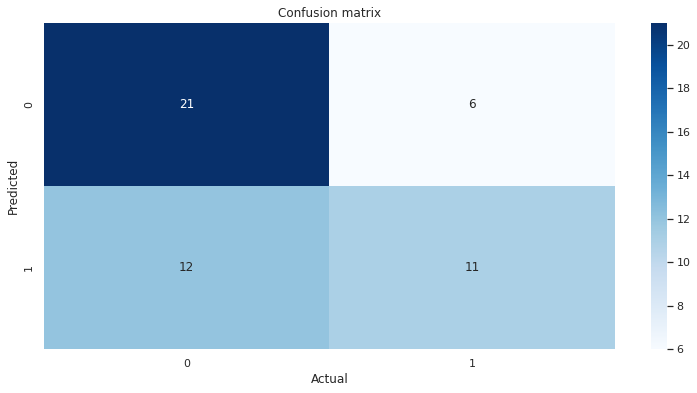

In [ ]:
conf_matrix = confusion_matrix(y_test, gbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()


Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = GradientBoostingClassifier(random_state = 8)
base_model.fit(X_train, y_train)
accuracy_score(y_test, base_model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.46

In [ ]:
best_gbc.fit(X_train, y_train)
accuracy_score(y_test, best_gbc.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.64

#### **4.1.11 Save the results into a Dataframe for later comparison**

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'Gradient Boosting',
     'Training Set Accuracy': accuracy_score(y_train, best_gbc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, gbc_pred)
}

df_models_gbc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_gbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Gradient Boosting,0.984925,0.64


Let's save the model and this dataset:

In [ ]:
# with open('best_gbc.pickle', 'wb') as output:
#     pickle.dump(best_gbc, output)
    
# with open('df_models_gbc.pickle', 'wb') as output:
#     pickle.dump(df_models_gbc, output)

### **4.2 Random_Forrest**


#### **4.2.1 Concepts**

Probably by now most of you now the concept of a decision tree, but just in case we will start we a quick review.

##### __Decision tree__

A decision tree is a simple prediction model in which we analyze the correlation between the parameters and the class, for example if we have a pet dataset like this:

    weight   skin       colour       species
    7        "furr"     "brown"      "dog"
    3.8      "furr"     "brown"      "cat"
    2        "scales"   "white"      "snake"
    4.5      "furr"     "brown"      "dog"
    1        "furr"     "white"      "dog"
    4        "furr"     "white"      "cat"

Skin = scales would have the biggest weight since in each case in which appears the clase is snake.

Then we chose that condition and evaluate both cases when it's true the class will be snake, if is false we can't know so we will repeat the process.

To create a decision tree in python we can do this (sklearn decision trees don't allow categorical values so we will change furr to 0, scales to 1, white to 0 and brown to one):


[Text(446.40000000000003, 237.82500000000002, 'skin <= 0.5\ngini = 0.611\nsamples = 6\nvalue = [2, 3, 1]\nclass = dog'),
 Text(334.8, 169.875, 'weight <= 4.25\ngini = 0.48\nsamples = 5\nvalue = [2, 3, 0]\nclass = dog'),
 Text(223.20000000000002, 101.92500000000001, 'weight <= 2.4\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]\nclass = cat'),
 Text(111.60000000000001, 33.974999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = dog'),
 Text(334.8, 33.974999999999994, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = cat'),
 Text(446.40000000000003, 101.92500000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = dog'),
 Text(558.0, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = snake')]

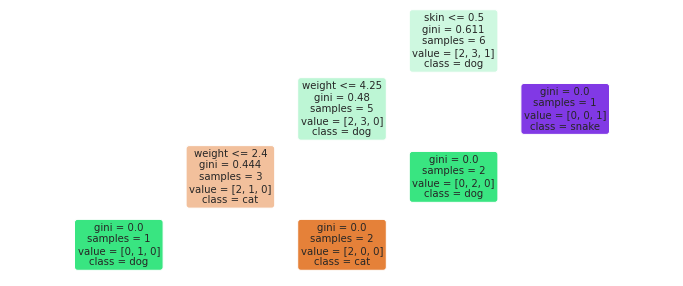

In [ ]:
pet_df = pd.DataFrame(
    np.array([[7, 0, 1, "dog"], [3.8, 0, 1, "cat"], [2, 1, 0, "snake"], [4.5, 0, 1, "dog"], [1, 0, 0, "dog"], [4, 0, 0, "cat"]]
             ), columns=["weight", "skin", "colour", "species"])


pet_df.skin = pet_df.skin.astype("category")
pet_df.colour = pet_df.colour.astype("category")

pet_X = pet_df.drop(["species"], axis=1)
pet_y = pet_df.species



pet_tree = tree.DecisionTreeClassifier(random_state=8)
pet_tree = pet_tree.fit(pet_X, pet_y)

plt.figure(figsize = (12,5))
tree.plot_tree(pet_tree, filled="true", rounded="true", feature_names=pet_X.columns,  class_names=["cat", "dog", "snake"])

Notice that we go to the left box when the condition is satisfied and to the right one when it isn't. Notice to that sklearn tree won't recognize categorical values so they are treated like numeric, but when there is one two possible values this is equivalent since the condition becomes <= 0.5 which is the same than divide the cases by category 0 or category 1, if we have a tree with more than two options for a categorical value we need to find a method to convert any possible values to zeros or ones (you can cheek "one hot encoding").

##### __Random forest__
The biggest problem with random tree is that this tend to overfit since the values that are check first can be quite arbitrary, random forest are disigned to fixt this isue.

A random forest is, in a nut shell, a bootstrap aggregation of decision trees, what this means is that we create a certain number of trees each one with from a random subset of te data, then when we want to clasify a new value we'll try with every tree and we will asigne it the class suggest by most.

![](https://drive.google.com/uc?export=view&id=1anEe5fjGGsM5c0JifdBi8sYAW1Rq6gv4)


#### **4.2.2 Training the model**

As we have done with the previous method, it is necessary initialise hyperparameters.

In [ ]:
r = random.Random()
lim_unigram = 5000
target_size = 4
hidden_size = 100
train_keep_prob = 0.6
l2_alpha = 0.00001
learn_rate = 0.01
clip_ratio = 5
batch_size_train = 500
epochs = 90

#### **4.2.3 Cross-Validation for Hyperparameter tuning**

We do the same process as we did with the gradient boosting machine fot the hyperparameter tuning. 

First, we can see what hyperparameters the model has:



In [ ]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

Tree-related hyperparameters:
* `n_estimators` = number of trees in the forest.
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node



We first need to define the grid. Since we have a huge amount of hyperparameters, we'll try few values for each one.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


The forest could be more accurate with or without bootstrap, with more or less deept... so we will cheeck the diferent posibilities with a RandomForestClassifier, this has the next parameters.

* `param_distributions:` the parameters we want to cheeck

* `n_iter:` number of iterations in witch we check diferent parameter combinations

* `scoring:` scoring method

* `cv:` (cross validation) number of folds

* `verbose:` verbosity on fitting and predicting

* `random_state:` randomness seed

`n_iter` and `cv` are the most significant in execution time but are also the mores significant to find better results.

#### **4.2.4 Randomized Search Cross Validation**

We'll perform the Random Search with the Scikit Learn method RandomizedSearchCV.

In [ ]:
rfc = RandomForestClassifier(random_state=8)

random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selectio

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.5126639529624604


#### **4.2.5 Grid Search Cross Validation**

 we'll perform the Grid Search with the Scikit Learn method GridSearchCV.

In [ ]:
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

rfc = RandomForestClassifier(random_state=8)

cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selectio

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sampl...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                  

We can see the best hyperparameters resulting from the Grid Search:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.5202020202020202


In [ ]:
best_rfc = grid_search.best_estimator_

In [ ]:
best_rfc

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

#### **4.2.6 Model fit and performance**

Now, we can fit the model to our training data:

In [ ]:
best_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = best_rfc.predict(X_test)

#### **4.2.7 Training accuracy**

As we did before with the sklearn.metrics we can see some interesting metric of our model.

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_rfc.predict(X_train)))

The training accuracy is: 
0.9849246231155779


#### **4.2.8 Test accuracy**

In [ ]:
print("The test accuracy is: ")
print(accuracy_score(y_test, rfc_pred))

The test accuracy is: 
0.6


#### **4.2.9 Classification report**

In [ ]:
print("Classification report")
print(classification_report(y_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        27
           1       0.57      0.52      0.55        23

    accuracy                           0.60        50
   macro avg       0.60      0.59      0.59        50
weighted avg       0.60      0.60      0.60        50



#### **4.2.10 Confusion matrix**

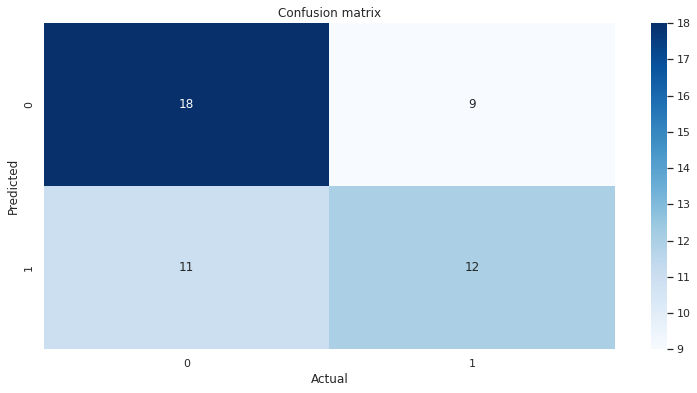

In [ ]:
conf_matrix = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(X_train, y_train)
accuracy_score(y_test, base_model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.58

#### **4.2.11 Save the results into a Dataframe for later comparison**

The remaining code is to save the results

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(y_train, best_rfc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.984925,0.6


In [ ]:
# with open('/content/best_rfc.pickle', 'wb') as output:
#     pickle.dump(best_rfc, output)
    
# with open('/content/df_models_rfc.pickle', 'wb') as output:
#     pickle.dump(df_models_rfc, output)

### **4.3 Ridge Logistic Regression**

#### **4.3.1 Concepts**

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').

When we talk about Regression, we often end up discussing Linear and Logistic Regression. But do you know that there are 7 types of regressions?

In this case we are going to talk about Ridge Regression. Ridge regression is a regularization technique for linear regression model to perform well in scenarios where there is high variance as compare to the data which is used to train the model. When we talk about regularization we talk about a technique to penalize the model for the overfitting of data and adding the parameter which tune the model for better outcome.



**Linear Regression**

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

![](https://drive.google.com/uc?export=view&id=1wkyZS-b1Ap_yU5J8P-pQyun3Ev3Y8ZJi)

**Ridge Regression**

Ridge Regression is a technique used when the data suffers from multicollinearity ( independent variables are highly correlated). In multicollinearity, even though the least squares estimates (OLS) are unbiased, their variances are large which deviates the observed value far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

![](https://drive.google.com/uc?export=view&id=1G-Y-s33Npes5FHOQnauzOMpQE2CcPsnd)

#### **4.3.2 Training the model**

Let's implement the algorithm in Python, we will use again the scikit-learn an open source machine learning library. Also in this model we will use TensorFlow. TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.







We define a function to save the predictions of our model in a CSV file.


In [ ]:
def save_predictions(pred, file):

    with open(file, 'w') as csvfile:
        fieldnames = ['Stance']
        writer = DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for instance in pred:
            writer.writerow({'Stance': label_ref_rev[instance]})

We set a value before training to our hyperparameters.

In [ ]:
# Initialise hyperparameters
r = random.Random()
lim_unigram = 5000
target_size = 4
hidden_size = 100
train_keep_prob = 0.6
l2_alpha = 0.00001
learn_rate = 0.01
clip_ratio = 5
batch_size_train = 500
epochs = 90

#### **4.3.3 Cross-Validation for Hyperparameter tuning**

As some of the previously trained models, it is necessary to optimize the hyperparameters.

In [ ]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

* `C` = Inverse of regularization strength. Smaller values specify stronger regularization.
* `multi_class` = We'll choose `multinomial` because this is a multi-class problem.
* `solver` = Algorithm to use in the optimization problem. For multiclass problems, only `newton-cg`, `sag`, `saga` and `lbfgs` handle multinomial loss.
* `class_weight`: Weights associated with classes. 
* `penalty`: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

#### **4.3.4 Randomized Search Cross Validation**

First we need to define the grid since we have a lot of hyperparameters.

In [ ]:
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
class_weight = ['balanced', None]
penalty = ['l2']

random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


we'll perform the Grid Search with the Scikit Learn method RandomizedSearchCV.

In [ ]:
lrc = LogisticRegression(random_state=8)

random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balanc

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.5177898386853611


After that, we can do a more exhaustive search centered in those values:

#### **4.3.5 Grid Search Cross Validation**

we'll perform the Grid Search with the Scikit Learn method GridSearchCV.

In [ ]:
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['sag']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

lrc = LogisticRegression(random_state=8)

cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=...
             param_grid={'C': [0.6, 0.6444444444444444, 0.6888888888888889,
                               0.7333333333333333, 0.7777777777777778,
                               0.8222222222222222, 0.8666666666666667,
                               0.9111111111111111, 0.9555555555555555, 1.0]

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.8222222222222222, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.5050505050505051


Let's save the model in `best_lrc`:

In [ ]:
best_lrc = grid_search.best_estimator_

In [ ]:
best_lrc

LogisticRegression(C=0.8222222222222222, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

We now know the best logistic regression model. Let's fit it and see how it performs:

#### **4.3.6 Model fit and performance**

Now, we can fit the model to our training data:

In [ ]:
best_lrc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.8222222222222222, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

And get the predictions:

In [ ]:
lrc_pred = best_lrc.predict(X_test)

The conditional class probabilities can be obtained by typing:

`lrc_pred = best_lrc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### **4.3.7 Training accuracy**

As we did before with the sklearn.metrics we can see some interesting metric of our model.

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_lrc.predict(X_train)))

The training accuracy is: 
0.8241206030150754


#### **4.3.8 Test accuracy**

In [ ]:
print("The test accuracy is: ")
print(accuracy_score(y_test, lrc_pred))

The test accuracy is: 
0.34


#### **4.3.9 Classification report**

In [ ]:
print("Classification report")
print(classification_report(y_test,lrc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        27
           1       0.27      0.26      0.27        23

    accuracy                           0.34        50
   macro avg       0.33      0.33      0.33        50
weighted avg       0.34      0.34      0.34        50



#### **4.3.10 Confusion matrix**

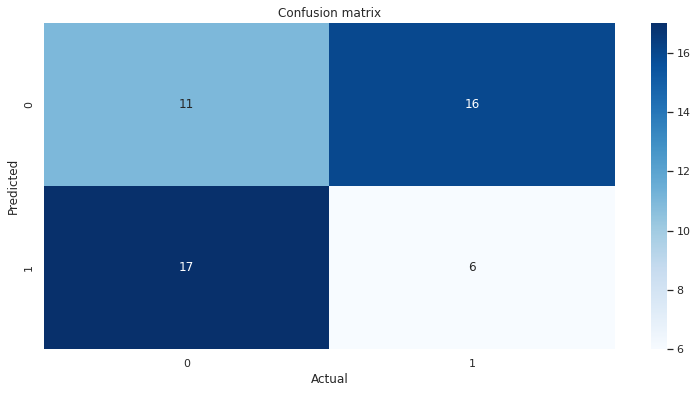

In [ ]:
conf_matrix = confusion_matrix(y_test, lrc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()


Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(X_train, y_train)
accuracy_score(y_test, base_model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.36

In [ ]:
best_lrc.fit(X_train, y_train)
accuracy_score(y_test, best_lrc.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.34

We get approximately the same accuracy.

#### **4.3.11 Save the results into a Dataframe for later comparison**

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(y_train, best_lrc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, lrc_pred)
}

df_models_lrc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_lrc

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.824121,0.34


Let's save the model and this dataset:

In [ ]:
# with open('Models/best_lrc.pickle', 'wb') as output:
#     pickle.dump(best_lrc, output)
    
# with open('Models/df_models_lrc.pickle', 'wb') as output:
#     pickle.dump(df_models_lrc, output)

### **4.4 Comparing Results**

Here we will compare the performance of several models in order to select the best one to classify fake news.

In [ ]:
df_models_gbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Gradient Boosting,0.984925,0.64


In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.984925,0.6


In [ ]:
df_models_lrc

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.824121,0.34


The most accurate algorithm is Gradient Boosting.



## **5. Build and share data apps with Streamlit** 

Here we can see an interactive App about our Fake News EDA built with Streamlit

In [ ]:
%%writefile streamlit.py
import numpy as np
import pandas as pd
!pip3 install streamlit
import streamlit as st
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

st.title("EDA FAKE NEWS")
st.header("We can see an interactive App about our Fake News EDA built with streamlit")
st.header("")

#EDA
my_dataset = 'train_df.csv'

#Load Dataset
@st.cache(persist = True)
def explore_data(dataset):
  df = pd.read_csv(os.path.join(dataset))
  return df

data = explore_data(my_dataset)

if st.checkbox("Show Dataset"):
  if st.button("Head"):
    st.write(data.head())
  elif st.button("Tail"):
    st.write(data.tail())
  else: 
    st.write(data.head(2))  

st.text("")

#Show entire dataset
if st.checkbox("Show All Dataset"):
  st.dataframe(data) 

st.text("")

#Show Column Name
if st.checkbox("Show Column Names"):
  st.write(data.columns) 

st.text("")

#Show dimensions
data_dimensions = st.radio("What Dimensions Do You Want to See", ("Rows", "Columns", "All"))
if data_dimensions == "Rows":
  st.text("Showing Rows")
  st.write(data.shape[0])
elif data_dimensions == "Columns":
  st.text("Showing Columns")
  st.write(data.shape[1])
else:
  st.text("Showing Shape of Dataset")
  st.write(data.shape)

st.text("")

#Show SetRevisionSummary
if st.checkbox("Show Summary of Dataset"):
  st.write(data.describe())

st.text("")

#Select a Column
col_option = st.selectbox("Select Column", ("Body ID","Stance", "pos_tags_body", "pos_tags_headline", "wordnet_pos_body", 
"wordnet_pos_headline", "lemmatized_body_string", "lemmatized_headline_string"))
if col_option == "Body ID":
  st.write(data['Body ID'])
elif col_option == "Stance":
  st.write(data['Stance'])
elif col_option == "pos_tags_body":
  st.write(data['pos_tags_body'])
elif col_option == "pos_tags_headline":
  st.write(data['pos_tags_headline'])
elif col_option == "wordnet_pos_body":
  st.write(data['wordnet_pos_body'])
elif col_option == "wordnet_pos_headline":
  st.write(data['wordnet_pos_headline'])
elif col_option == "lemmatized_body_string":
  st.write(data['lemmatized_body_string'])
elif col_option == "lemmatized_headline_string":
  st.write(data['lemmatized_headline_string'])
else:
  st.write("Select Column")

st.text("")

#Plot

def plot_CountArticlesByStance():

  stances = data['Stance']

  pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
  fmt = '{x:,.0f}'
  plt.figure(figsize=(12.8,6))
  ax = stances.value_counts().plot(kind='bar', color=pkmn_type_colors,rot=0)
  ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
  for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
  plt.xlabel("Stance", labelpad=14)
  plt.ylabel("Articles", labelpad=14)
  plt.title("Count Articles by Stance", y=1.02);

def plot_PercentatgeArticlesByStance():
  pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

  train_df_by_stances = data.groupby('Stance')['Body ID'].count()
  TotalArticles = train_df_by_stances[0:].sum()
  train_df_by_stances['Percent of Total'] = train_df_by_stances[0:]*100 / TotalArticles
  print(train_df_by_stances['Percent of Total'])

  plt.figure(figsize=(18.6,6))
  ax= train_df_by_stances['Percent of Total'].plot(kind='bar', color=pkmn_type_colors)
  labels = list(train_df_by_stances.index)
  ax.set_xlabel(labels)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())

  for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

  plt.xlabel("Stance", labelpad=14)
  plt.ylabel("% of Articles", labelpad=14)
  plt.title("% of Articles in each Stance", y=1.02);


plot_option = st.selectbox("Some graphics about our Dataset", ("Count Articles By Stance", "Percentatge of Articles By Stance"))

if plot_option == "Count Articles By Stance":
  st.text("0 = Fake, 1 = Fact")
  st.write(plot_CountArticlesByStance())
  st.set_option('deprecation.showPyplotGlobalUse', False)
  st.pyplot()
if plot_option == "Percentatge of Articles By Stance":
  st.text("0 = Fake, 1 = Fact")
  st.write(plot_PercentatgeArticlesByStance())
  st.set_option('deprecation.showPyplotGlobalUse', False)
  st.pyplot()

2021-05-03 17:19:17.530 WARNING root: 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


InternalHashError: ignored

## **6. Deployment of our best model** 


After training and selecting the best model, the last step is converting our python script into a webapp or an application so that users can use it without the manipulation of codes and in a friendly user interface. Flask python-driven web application is a good choice.

The advantage of web applications is that they’re platform independent and can be run by anyone who has access to the Internet. Their code is implemented on a back-end server, where the program processes incoming requests and responds through a shared protocol that’s understood by all browsers.

Python powers many large web applications and is a common choice as a back-end language. Many Python-driven web applications are planned from the start as web applications and are built using Python web frameworks such as Flask.

Python-driven web applications use Python code to determine what actions to take and what content to show. Your code is run by the web server that hosts your website, which means that your users don’t need to install anything. All they need to interact with your code is a browser and an Internet connection. Getting Python to run on a website can be complicated, but there are a number of different web frameworks that automatically take care of the details.

For more details, you could check: https://realpython.com/python-web-applications/ 


## **7. Conclusion** 

# 🌐 Sources used in this notebook


*  Training and testing examples were taken from http://www.fakenewschallenge.org/

*   Parts of our code or text were reused from the following notebooks:
   *  https://colab.research.google.com/drive/14MTJZLVmGNCxeb4mDslTTTk51o1SC5fb?authuser=5#scrollTo=yXfTwR7Ue0on
   *  https://github.com/StavroK/MtySaturdayAI2020
  
* This workshop was inspired by the following Saturdays.AI project:
   *  https://github.com/StavroK/MtySaturdayAI2020/blob/master/decks/2020_Mty_Saturdays_Project_BKaramanosvDEMODAY.pptx

We got support from several different website some are listed below:
https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28
https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb